<b>이미지 라벨링</b><br>
파일명에 라벨 포함<br>
파일명에서 클래스 정보 추출 <br>
산과 바다 구분

In [1]:
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

In [2]:
import math
import numpy as np
from glob import glob
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [23]:
IMG_CHANNELS = 3
IMG_ROWS = 64
IMG_COLS = 64
CLASSES = 4  # 산, 바다, 남자, 여자

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
# 파일 경로에 대한 glob 패턴을 수정하세요.
# 폴더로 정리되어있는데, 분류가 폴더형태로 되어있다고 보면 됨.
mountain_files = glob('/content/drive/MyDrive/m_산/*jpg')
sea_files = glob('/content/drive/MyDrive/s_바다/*jpg')
man_files = glob('/content/drive/MyDrive/man/*jpg')
woman_files = glob('/content/drive/MyDrive/woman/*jpg')

# 이미지와 라벨을 불러오는 함수 정의
def load_images_and_labels(files, label):
    images = []
    labels = []
    for p in files:
        try:
            img = image.load_img(p, target_size=(IMG_ROWS, IMG_COLS))
            images.append(img)
            labels.append(label)
        except OSError as e:
            print(f"Skipping file {p} due to error: {e}")
    return images, labels

# 산과 바다 이미지 및 라벨 불러오기
mountain_images, mountain_labels = load_images_and_labels(mountain_files, 0)  # 산을 0으로 라벨링
sea_images, sea_labels = load_images_and_labels(sea_files, 1)  # 바다를 1로 라벨링
man_images, man_labels = load_images_and_labels(man_files, 2)
woman_images, woman_labels = load_images_and_labels(woman_files, 3)

# 이미지와 라벨 병합
images = mountain_images + sea_images + man_images + woman_images
y = mountain_labels + sea_labels + man_labels + woman_labels

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (109542160 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Skipping file /content/drive/MyDrive/man/ma_33.jpg due to error: broken data stream when reading image file


In [27]:
#define the convnet
def build(input_shape, classes):
    model = models.Sequential()
    model.add(layers.Convolution2D(32, (3, 3), activation='relu',
                        input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(classes, activation='softmax'))
    return model

In [28]:
# 이미지 벡터화
image_vector = np.asarray([image.img_to_array(img) for img in images])

In [29]:
image_vector[0]

array([[[254., 254., 254.],
        [  0.,   0.,   0.],
        [ 95.,  95.,  95.],
        ...,
        [133., 133., 133.],
        [  1.,   1.,   1.],
        [ 70.,  70.,  70.]],

       [[255., 255., 255.],
        [ 21.,  21.,  21.],
        [148., 148., 148.],
        ...,
        [ 42.,  42.,  42.],
        [ 26.,  26.,  26.],
        [ 18.,  18.,  18.]],

       [[179., 179., 179.],
        [108., 108., 108.],
        [251., 251., 251.],
        ...,
        [ 62.,  62.,  62.],
        [ 59.,  59.,  59.],
        [ 76.,  76.,  76.]],

       ...,

       [[ 17.,  17.,  17.],
        [149., 149., 149.],
        [ 14.,  14.,  14.],
        ...,
        [201., 201., 201.],
        [161., 161., 161.],
        [153., 153., 153.]],

       [[  9.,   9.,   9.],
        [ 69.,  69.,  69.],
        [ 14.,  14.,  14.],
        ...,
        [151., 151., 151.],
        [147., 147., 147.],
        [126., 126., 126.]],

       [[  1.,   1.,   1.],
        [ 32.,  32.,  32.],
        [  6.,  

In [30]:
image_vector.shape

(510, 64, 64, 3)

In [31]:
image_vector[0].shape

(64, 64, 3)

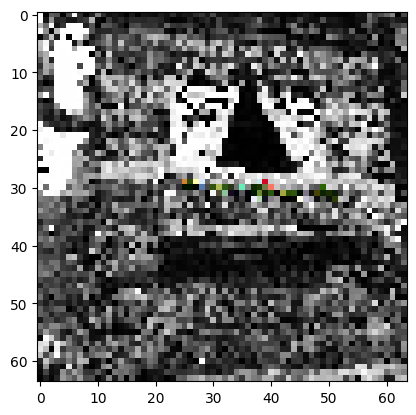

In [32]:
plt.imshow(image_vector[0]/255)

In [ ]:
# y=[1] * 1000 + [0] * 1000

In [12]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_vector, y, test_size=0.20, random_state=0)

In [34]:
X_train.shape

(408, 64, 64, 3)

In [36]:
X_train, X_test = X_train / 255, X_test / 255
# convert to categorical
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 4)
y_test = tf.keras.utils.to_categorical(y_test, 4)

In [17]:
y_train[83]

array([1., 0.], dtype=float32)

In [37]:
model=build((IMG_ROWS, IMG_COLS, IMG_CHANNELS), CLASSES)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                984096    
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                      

In [39]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.1)

Epoch 1/50
3/3 [==============================] - 5s 939ms/step - loss: 1.3262 - accuracy: 0.3270 - val_loss: 1.3345 - val_accuracy: 0.2927
Epoch 2/50
3/3 [==============================] - 2s 541ms/step - loss: 1.2986 - accuracy: 0.3161 - val_loss: 1.3254 - val_accuracy: 0.2927
Epoch 3/50
3/3 [==============================] - 2s 576ms/step - loss: 1.2870 - accuracy: 0.3542 - val_loss: 1.3224 - val_accuracy: 0.3659
Epoch 4/50
3/3 [==============================] - 1s 450ms/step - loss: 1.2844 - accuracy: 0.3569 - val_loss: 1.3200 - val_accuracy: 0.3659
Epoch 5/50
3/3 [==============================] - 1s 350ms/step - loss: 1.2861 - accuracy: 0.3678 - val_loss: 1.3239 - val_accuracy: 0.3659
Epoch 6/50
3/3 [==============================] - 1s 362ms/step - loss: 1.2841 - accuracy: 0.3678 - val_loss: 1.3305 - val_accuracy: 0.3659
Epoch 7/50
3/3 [==============================] - 1s 550ms/step - loss: 1.2836 - accuracy: 0.3542 - val_loss: 1.3215 - val_accuracy: 0.3659
Epoch 8/50
3/3 [====

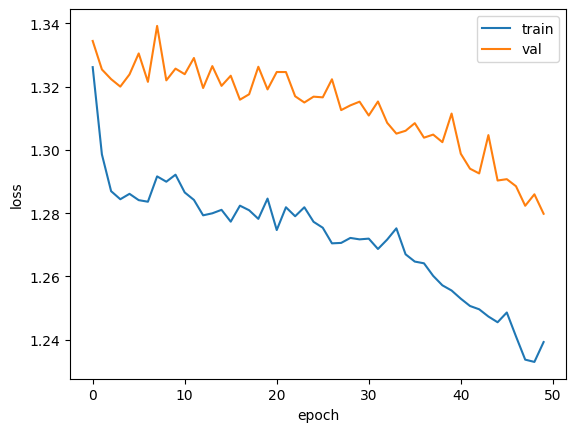

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

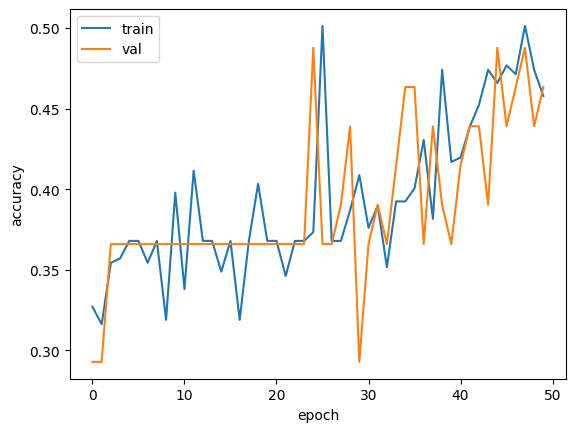

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [42]:
score = model.evaluate(X_test, y_test)
print("\nTest loss:", score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 17ms/step - loss: 1.2037 - accuracy: 0.5098

Test loss: 1.203709602355957
Test accuracy: 0.5098039507865906
